# Random Forest classifier test

In [8]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [9]:
def read_dataset(filename, campaign=None, features=None):
    df = pd.read_csv(filename)
    df = df.loc[:, ~df.columns.str.match('Unnamed')]
    df = df.loc[:, ~df.columns.str.match('Timestamp')]
    df = df.replace('DC', 1)
    df = df.replace('LTE', 0)
    df = df[df['campaign'].str.contains('Driving')]

    if campaign != None:
        df = df[df['campaign'] == campaign]
    
    if features == None:
        features = df.columns.drop('Mode')
        
    df, mode = df[features], df['Mode']

    return df, mode

In [10]:
results = {}

feature_selection = [['SINR'], ['RSRP'], ['RSRQ'], 
                     ['SINR', 'RSRQ'], ['SINR', 'RSRP'], ['RSRP', 'RSRQ'], ['SINR', 'RSRP', 'RSRQ'],
                     ['SINR', 'SSS_SINR'], ['RSRP', 'SSS_RSRP'], ['RSRQ', 'SSS_RSRQ'], 
                     ['SINR', 'RSRP', 'RSRQ', 'SSS_RSRP', 'SSS_SINR', 'SSS_RSRQ']]

for features in feature_selection:
    used_features = ', '.join(features)
    feats = features.copy()
    X, y = read_dataset('datasets/Op1_merged.csv', features=features)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    results[used_features] = {'Accuracy': accuracy,
                              'Precision': precision,
                              'Recall': recall,
                              'y_test' : y_test,
                              'y_pred' : y_pred,
                              'model': rf}

In [11]:
df_results = pd.DataFrame.from_dict(results, orient='index')

df_results.reset_index(inplace=True)
df_results.rename(columns={'index': 'Combination'}, inplace=True)
df_results = df_results.drop(['y_pred', 'y_test', 'model'], axis=1)
df_results

,Combination,Accuracy,Precision,Recall
0,SINR,0.892458,0.846468,0.860107
1,RSRP,0.905590,0.862150,0.886167
2,RSRQ,0.801331,0.763192,0.684967
3,"SINR, RSRQ",0.970630,0.971769,0.948907
4,"SINR, RSRP",0.971340,0.974784,0.946926
5,"RSRP, RSRQ",0.971961,0.974734,0.948421
6,"SINR, RSRP, RSRQ",0.974445,0.969973,0.959581
7,"SINR, SSS_SINR",0.964774,0.961988,0.942468
8,"RSRP, SSS_RSRP",0.972316,0.965760,0.958775
9,"RSRQ, SSS_RSRQ",0.967436,0.959693,0.952608


In [12]:
df_results = df_results[df_results['Accuracy'] > 0.95]
df_results

,Combination,Accuracy,Precision,Recall
3,"SINR, RSRQ",0.970630,0.971769,0.948907
4,"SINR, RSRP",0.971340,0.974784,0.946926
5,"RSRP, RSRQ",0.971961,0.974734,0.948421
6,"SINR, RSRP, RSRQ",0.974445,0.969973,0.959581
7,"SINR, SSS_SINR",0.964774,0.961988,0.942468
8,"RSRP, SSS_RSRP",0.972316,0.965760,0.958775
9,"RSRQ, SSS_RSRQ",0.967436,0.959693,0.952608
10,"SINR, RSRP, RSRQ, SSS_RSRP, SSS_SINR, SSS_RSRQ",0.987311,0.981398,0.984450


-359


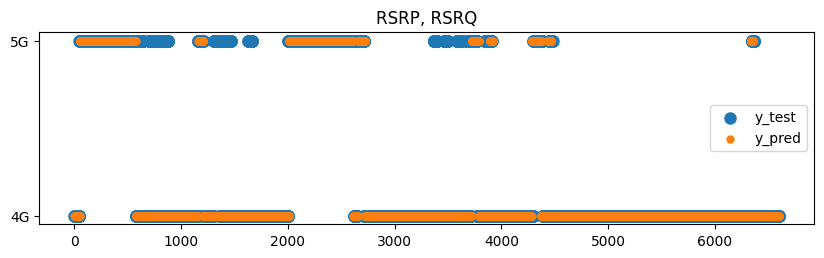

In [13]:
selected_combination = 'RSRP, RSRQ'
combination = results[selected_combination]
campaign='Interactivity_gaming_4G5G_TIM_Driving_Palasport_to_Via_Appia_End_No_Flight_Mode'
df, mode = read_dataset('datasets/Op1_merged.csv', campaign=campaign, features=['RSRP', 'RSRQ'])
y_pred = combination['model'].predict(df)
print(np.sum(np.array(y_pred) - np.array(mode)))

f = plt.figure(figsize=(10, 2.5))
plt.scatter([i for i in range(len(mode))], mode, label='y_test', linewidths=3)
plt.scatter([i for i in range(len(y_pred))],y_pred, label='y_pred', linewidths=0.001)
plt.title(selected_combination)
plt.yticks([0, 1], ['4G', '5G'])
plt.legend()
plt.show()

-59


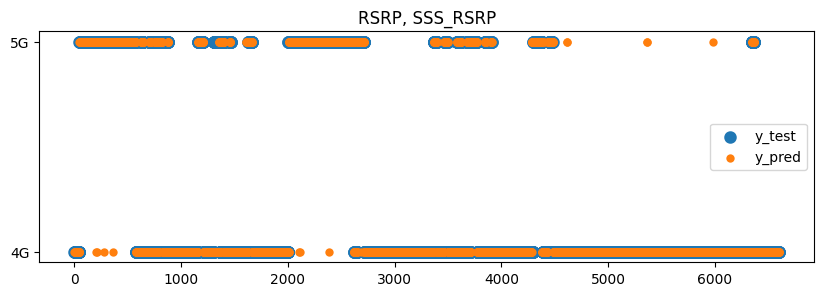

In [14]:
selected_combination = 'RSRP, SSS_RSRP'
combination = results[selected_combination]
campaign='Interactivity_gaming_4G5G_TIM_Driving_Palasport_to_Via_Appia_End_No_Flight_Mode'
df, mode = read_dataset('datasets/Op1_merged.csv', campaign=campaign, features=['RSRP', 'SSS_RSRP'])
y_pred = combination['model'].predict(df)
print(np.sum(np.array(y_pred) - np.array(mode)))

f = plt.figure(figsize=(10, 3))
plt.scatter([i for i in range(len(mode))], mode, label='y_test', linewidths=3)
plt.scatter([i for i in range(len(y_pred))],y_pred, label='y_pred', linewidths=0.001)
plt.title(selected_combination)
plt.yticks([0, 1], ['4G', '5G'])
plt.legend()
plt.show()

55


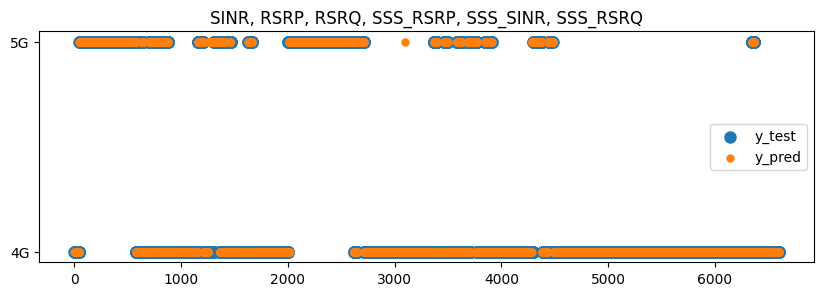

In [15]:
selected_combination = 'SINR, RSRP, RSRQ, SSS_RSRP, SSS_SINR, SSS_RSRQ'
combination = results[selected_combination]
campaign='Interactivity_gaming_4G5G_TIM_Driving_Palasport_to_Via_Appia_End_No_Flight_Mode'
df, mode = read_dataset('datasets/Op1_merged.csv', campaign=campaign, features=['SINR', 'RSRP', 'RSRQ', 'SSS_RSRP', 'SSS_SINR', 'SSS_RSRQ'])
y_pred = combination['model'].predict(df)
print(np.sum(np.array(y_pred) - np.array(mode)))

f = plt.figure(figsize=(10, 3))
plt.scatter([i for i in range(len(mode))], mode, label='y_test', linewidths=3)
plt.scatter([i for i in range(len(y_pred))],y_pred, label='y_pred', linewidths=0.001)
plt.title(selected_combination)
plt.yticks([0, 1], ['4G', '5G'])
plt.legend()
plt.show()